Лекция 2.6 Подбор параметров

в библиотеке scikit.learn есть функция GridSearchCV которая сама подбирает параметры, которые приведут к наилучшему обучению моделей

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import SVG, display, HTML
from graphviz import Source
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier

Подготовим данные

In [2]:
titanic_data = pd.read_csv('Titanic/train.csv')
new_data = titanic_data.drop(columns = ['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
y = titanic_data.Survived
new_data = pd.get_dummies(new_data).fillna({'Age': new_data.Age.median()})

In [3]:
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size = 0.33, random_state = 42)

Для работы функции необходимо передать ей два парметра: классификатор и параметры, которые нужно оптимизтровать

In [4]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [5]:
parameters = {'criterion' : ['gini', 'entropy'],
             'max_depth' : range(1,30)}

Теперь можно запустить функцию и посмотреть на результат

In [6]:
grid_search_cv_csv = GridSearchCV(clf, parameters, cv = 5)

In [7]:
grid_search_cv_csv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [8]:
grid_search_cv_csv.best_params_

{'criterion': 'entropy', 'max_depth': 8}

Сохраним лучшее сочетание параметров как новый классификатор

In [9]:
best_clf = grid_search_cv_csv.best_estimator_

In [10]:
best_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Посмотрим на точность предсказания прогнав дерево по тестовым данным

In [11]:
best_clf.score(X_test, y_test)

0.7864406779661017

Но мы не можем судить о точности, так как знаем, насколько реальные значения отличаются от предсказанных. Поэтому посчитаем метрики: precisi

In [12]:
y_pred = best_clf.predict(X_test)

In [13]:
precision_score(y_test, y_pred)

0.8064516129032258

In [14]:
recall_score(y_test, y_pred)

0.625

Проанализируем предсказываемые значения

Для этого выведем вероятность отнесения человека к выжившим или нет в виде массива из двух колонок: вероятность утонуть и веоятность выжить

In [15]:
y_pred_prob = best_clf.predict_proba(X_test)

Затем вывежем только вероятность выжить и построим гистаграмму полученных значений

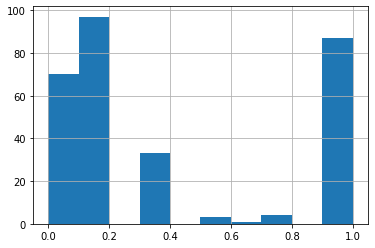

In [16]:
pd.Series(y_pred_prob[:, 1]).hist()

Видно, что есть некоторое количество человек которые не точно определены к какому-либо варианту. В зависимости от задачи стоит изменить ту вероятность выжить, с которой мы относим человека к классу выживших. Сейчас мы увеличим это значение и будем относить к выжившим только тех, у кого вероятность выжить больше 0.8

In [17]:
y_pred = np.where(y_pred_prob[:, 1] > 0.8, 1, 0)

Снова посчитаем метрики

In [18]:
precision_score(y_test, y_pred)

0.8160919540229885

In [19]:
recall_score(y_test, y_pred)

0.5916666666666667

Лекция 3.1 

In [20]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_split = 100,
                            min_samples_leaf = 10)

In [21]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

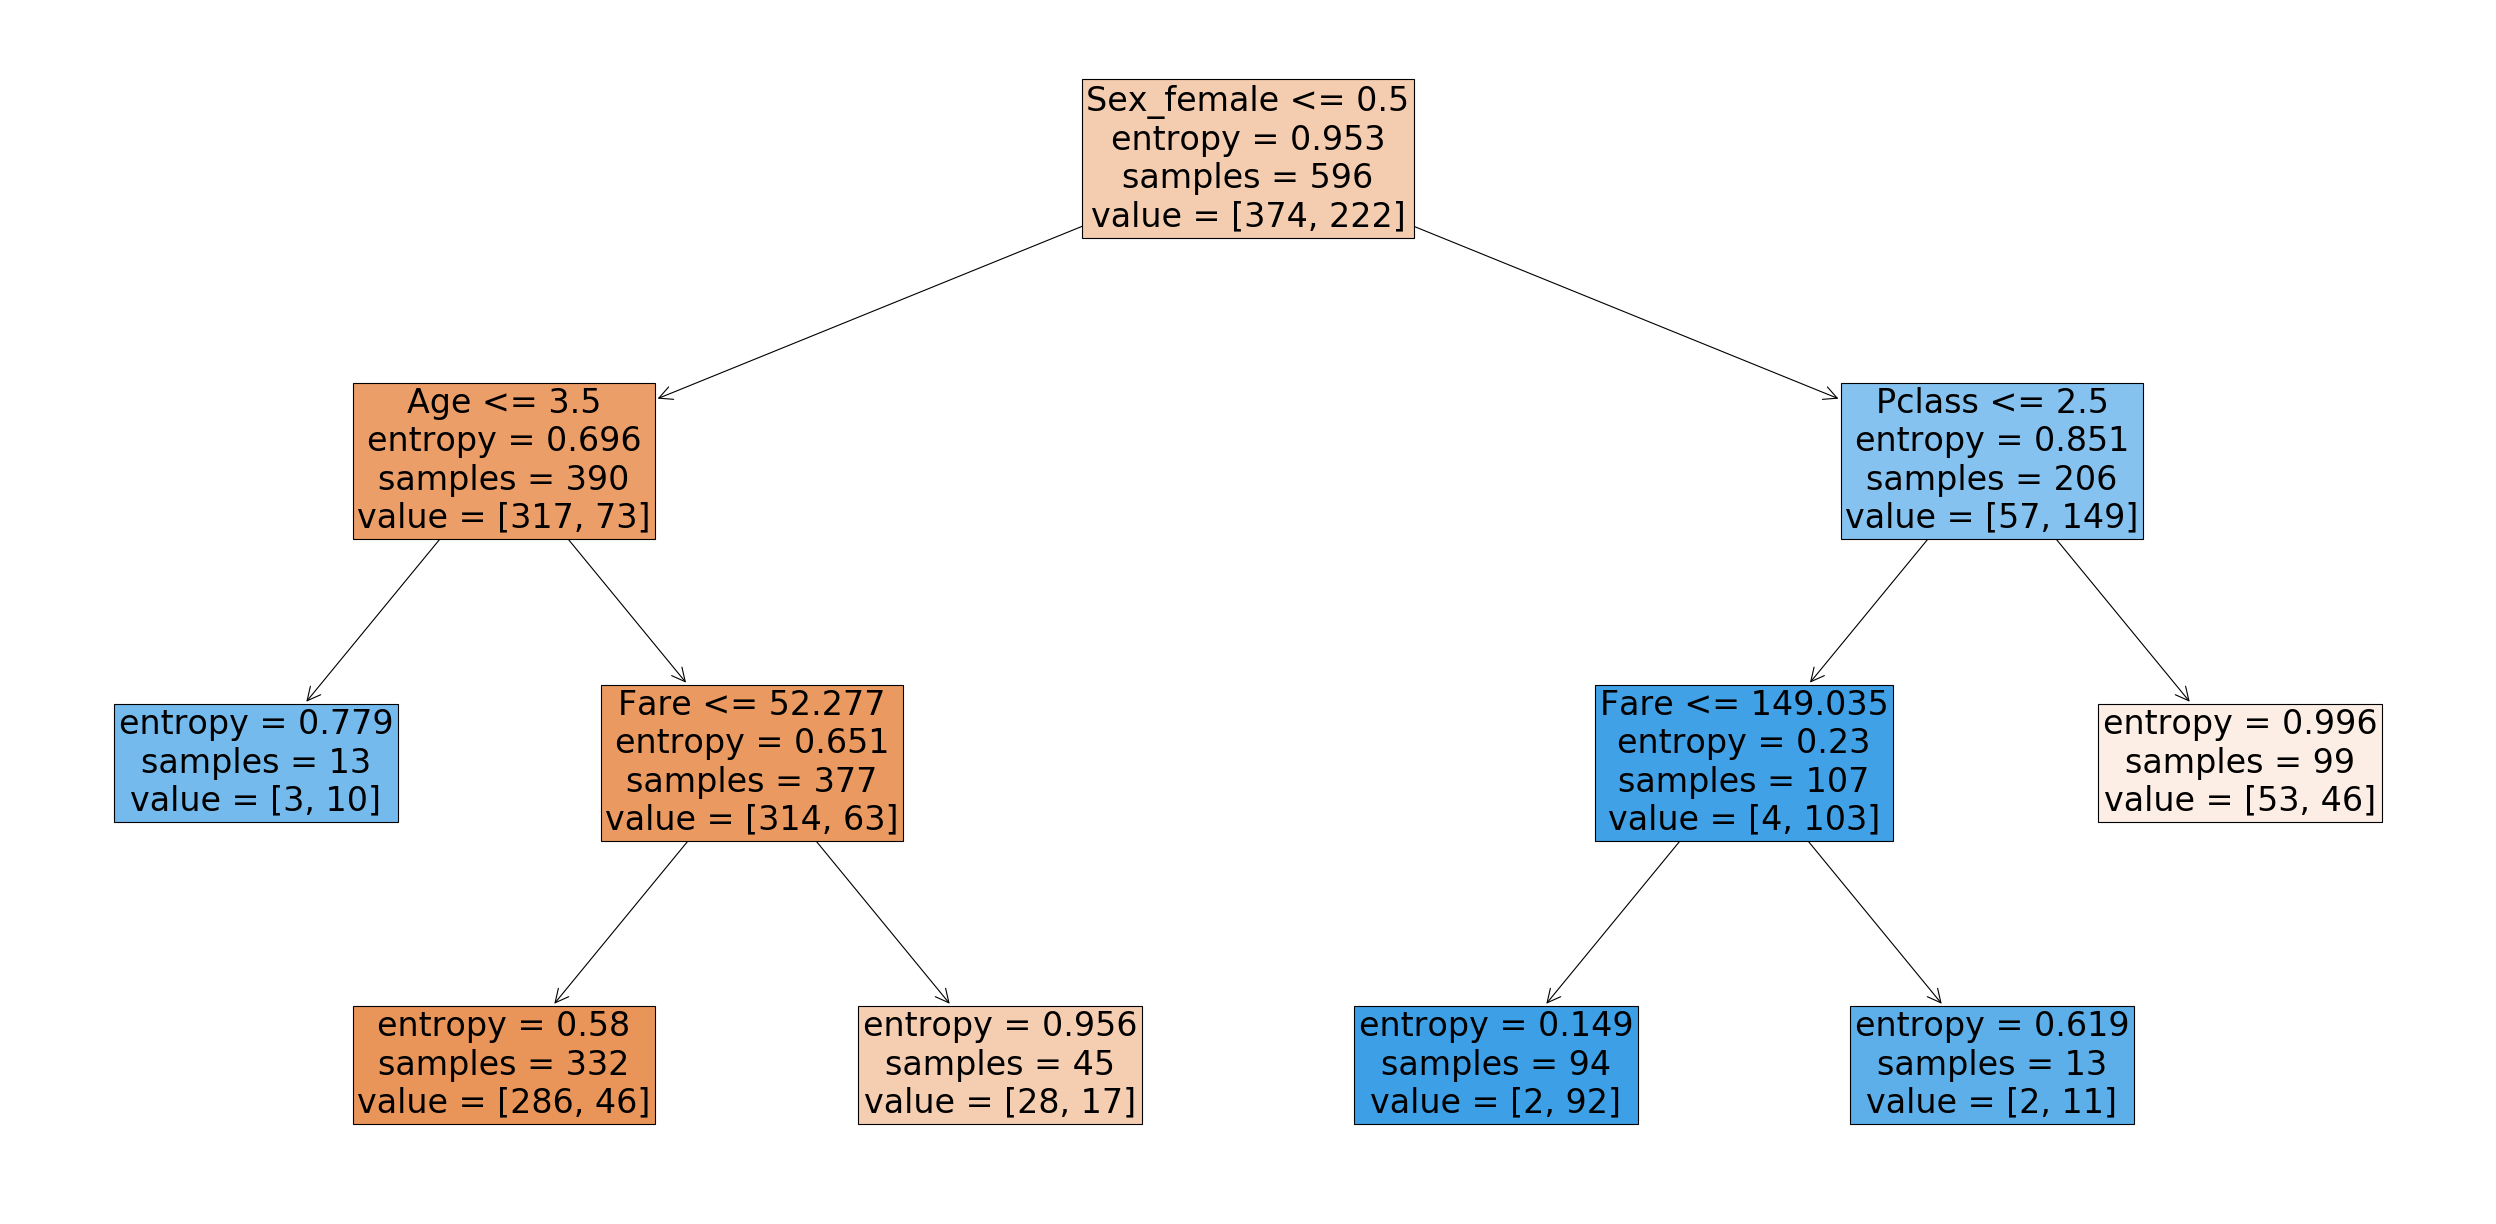

In [22]:
graph = Source(export_graphviz(clf, out_file = None,
                                   feature_names = list(new_data), class_names = ['Died', 'Survived'],
                                   filled = True))
plt.figure(figsize=(40, 20),dpi=80)
p = plot_tree(clf, fontsize=30,filled=True,feature_names=list(new_data))

In [23]:
clf_rf = RandomForestClassifier()

In [24]:
parameters = {'n_estimators' : [10, 20, 30], 'max_depth' : [2, 5, 7, 10]}
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv = 5)

In [25]:
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 20}

Задача

In [60]:
clf_rf = RandomForestClassifier()
parameters = {'n_estimators' : [15], 'max_depth' : [5]}
rf = GridSearchCV(clf_rf, parameters, cv = 5)
rf.fit(x_train, y_train)
predictions= rf.predict(x_test)

Продолжение лекции

In [26]:
best_clf = grid_search_cv_clf.best_estimator_

In [29]:
best_clf.score(X_test, y_test)

0.7932203389830509

In [32]:
feature_importances = best_clf.feature_importances_

In [36]:
feature_importances_df = pd.DataFrame({'features' :list(X_train),
                                       'feature_importances' : feature_importances})
feature_importances_df.sort_values('feature_importances', ascending = False) 

,features,feature_importances
5,Sex_female,0.325277
6,Sex_male,0.179599
4,Fare,0.140707
0,Pclass,0.118478
1,Age,0.103122
2,SibSp,0.040863
3,Parch,0.036304
9,Embarked_S,0.027471
7,Embarked_C,0.021833
8,Embarked_Q,0.006346


ЗАдача

In [37]:
heart_disease = pd.read_csv('heart.csv')

In [43]:
y = heart_disease.target
X = heart_disease.drop('target', axis = 1)

In [44]:
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)

In [45]:
rf = RandomForestClassifier(n_estimators = 15, max_depth = 5)
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

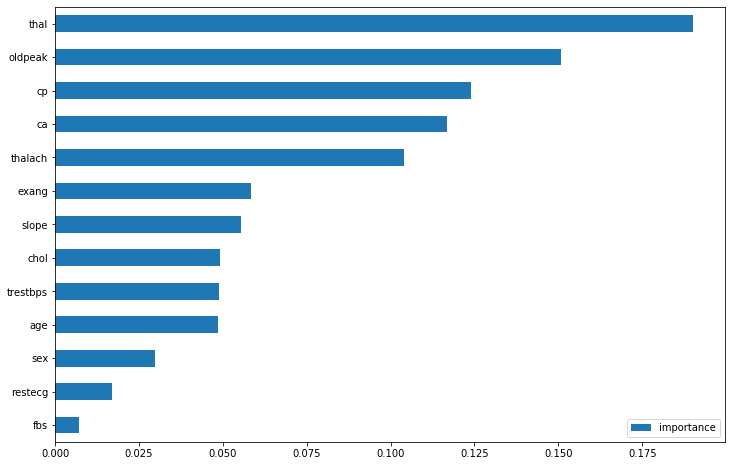

In [47]:
imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))